<a href="https://colab.research.google.com/github/Sunilkumar37/Cifar-10_Dataset/blob/main/Cifar_Dataset_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout,Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, ZeroPadding2D, Input
from keras.models import Model
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import pandas as pd
import glob
import os
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import to_categorical
from keras.datasets import cifar10
import tensorflow as tf
import pickle
#from keras

In [5]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm 
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DownloadProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

""" 
    check if the data (zip) file is already downloaded
    if not, download it from "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz" and save as cifar-10-python.tar.gz
"""
if not isfile('cifar-10-python.tar.gz'):
    with DownloadProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()

CIFAR-10 Dataset: 171MB [00:04, 39.8MB/s]                           


In [7]:
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

In [8]:
def display_stats(cifar10_dataset_folder_path, batch_id, sample_id):
    features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)
    
    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch #{}:'.format(batch_id))
    print('# of Samples: {}\n'.format(len(features)))
    
    label_names = load_label_names()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))
    
    sample_image = features[sample_id]
    sample_label = labels[sample_id]
    
    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
    
    plt.imshow(sample_image)


Stats of batch #3:
# of Samples: 10000

Label Counts of [0](AIRPLANE) : 994
Label Counts of [1](AUTOMOBILE) : 1042
Label Counts of [2](BIRD) : 965
Label Counts of [3](CAT) : 997
Label Counts of [4](DEER) : 990
Label Counts of [5](DOG) : 1029
Label Counts of [6](FROG) : 978
Label Counts of [7](HORSE) : 1015
Label Counts of [8](SHIP) : 961
Label Counts of [9](TRUCK) : 1029

Example of Image 9000:
Image - Min Value: 1 Max Value: 250
Image - Shape: (32, 32, 3)
Label - Label Id: 9 Name: truck


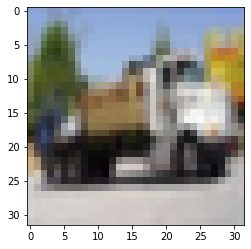

In [9]:
batch_id = 3
sample_id = 9000
display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

In [30]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [19]:
cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [33]:
x_train.shape

(50000, 32, 32, 3)

In [32]:
y_train.shape

(50000, 1)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

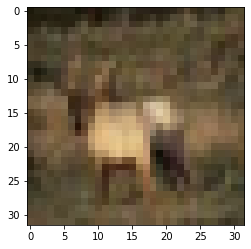

Label: [4]


In [ ]:
plt.imshow(x_train[3])
plt.show()
print('Label:',y_train[3])

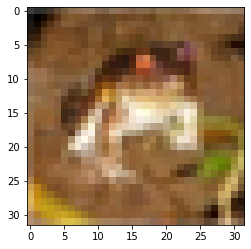

Label:  [6]


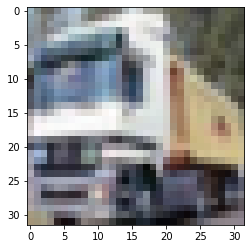

Label:  [4]


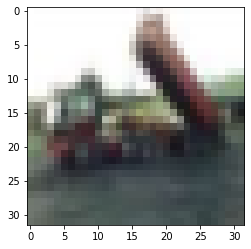

Label:  [4]


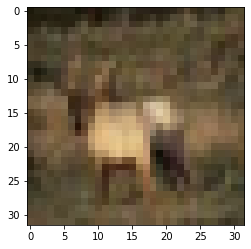

Label:  [0]


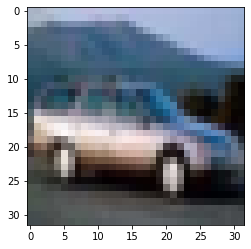

Label:  [7]


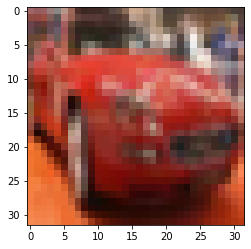

Label:  [1]


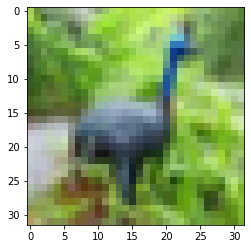

Label:  [2]


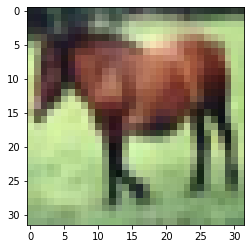

Label:  [1]


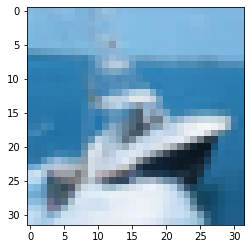

Label:  [0]


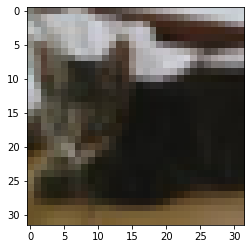

Label:  [1]


In [ ]:
for i in range(0,10):
    plt.imshow(x_train[i])    # show first number in the dataset
    plt.show()
    print('Label: ', y_train[i])

In [ ]:
X_train = x_train.reshape((x_train.shape[0],-1))
X_test = x_test.reshape((x_test.shape[0],-1))

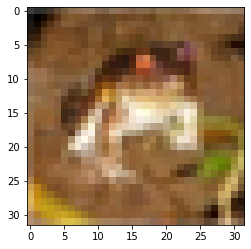

In [ ]:
plt.imshow(x_train[0])

In [ ]:
X_train.shape

(50000, 3072)

In [ ]:
# use only 40% of training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.60, random_state = 7)

In [12]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20000, 3072) (10000, 3072) (20000, 10) (10000, 10)


## Basic MLP model
Naive MLP model without any alterations

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(50,input_shape = (3072, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
438/438 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1037 - val_loss: 2.3027 - val_accuracy: 0.1008
Epoch 2/100
438/438 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1027 - val_loss: 2.3027 - val_accuracy: 0.1017
Epoch 3/100
438/438 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1015 - val_loss: 2.3027 - val_accuracy: 0.1017
Epoch 4/100
438/438 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3028 - val_accuracy: 0.1008
Epoch 5/100
438/438 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1018 - val_loss: 2.3028 - val_accuracy: 0.1008
Epoch 6/100
438/438 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1009 - val_loss: 2.3028 - val_accuracy: 0.1017
Epoch 7/100
438/438 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1021 - val_loss: 2.3027 - val_accuracy: 0.1008

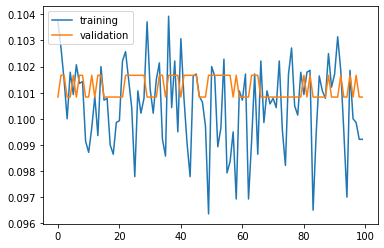

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3028 - accuracy: 0.1000


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.10000000149011612


# 1. Weight Initialization


*   Changing weight initialization scheme can significantly improve training of 
    the model by preventing vanishing gradient problem up to some degree
*   He normal or Xavier normal initialization schemes are SOTA at the moment
*   Doc: https://keras.io/initializers/



In [ ]:
model = Sequential()

In [ ]:
    model.add(Dense(50, input_shape = (3072, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))

In [ ]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 400,validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
35/35 [==============================] - 1s 23ms/step - loss: 2.3974 - accuracy: 0.0932 - val_loss: 2.3830 - val_accuracy: 0.1030
Epoch 2/100
35/35 [==============================] - 1s 19ms/step - loss: 2.3771 - accuracy: 0.0973 - val_loss: 2.3749 - val_accuracy: 0.1037
Epoch 3/100
35/35 [==============================] - 1s 18ms/step - loss: 2.3753 - accuracy: 0.0984 - val_loss: 2.3676 - val_accuracy: 0.1023
Epoch 4/100
35/35 [==============================] - 1s 18ms/step - loss: 2.3615 - accuracy: 0.1029 - val_loss: 2.3611 - val_accuracy: 0.1032
Epoch 5/100
35/35 [==============================] - 1s 20ms/step - loss: 2.3554 - accuracy: 0.1029 - val_loss: 2.3552 - val_accuracy: 0.1038
Epoch 6/100
35/35 [==============================] - 1s 19ms/step - loss: 2.3531 - accuracy: 0.1033 - val_loss: 2.3499 - val_accuracy: 0.1052
Epoch 7/100
35/35 [==============================] - 1s 19ms/step - loss: 2.3521 - accuracy: 0.1008 - val_loss: 2.3450 - val_accuracy: 0.1013
Epoch 

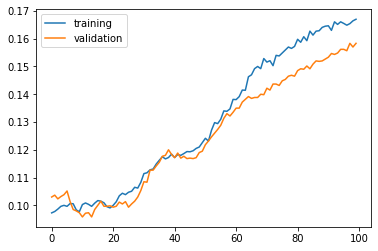

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.2933 - accuracy: 0.1582


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.1581999957561493


# 2. Nonlinearity (Activation function)

*   Sigmoid functions suffer from gradient vanishing problem, making training 
    slower
*   There are many choices apart from sigmoid and tanh; try many of them!  

      1.  'relu' (rectified linear unit) is one of the most popular ones
      2.  'selu' (scaled exponential linear unit) is one of the most recent ones

*   Doc: https://keras.io/activations/




In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(50, input_shape = (3072, ), kernel_initializer='he_normal'))
model.add(Activation('relu'))    # use relu
model.add(Dense(50, kernel_initializer='he_normal'))
model.add(Activation('relu'))    # use relu
model.add(Dense(50, kernel_initializer='he_normal'))
model.add(Activation('relu'))    # use relu
model.add(Dense(50, kernel_initializer='he_normal'))
model.add(Activation('relu'))    # use relu
model.add(Dense(10, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [ ]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
438/438 [==============================] - 2s 4ms/step - loss: 38995859373116.6094 - accuracy: 0.1065 - val_loss: 2.3026 - val_accuracy: 0.1005
Epoch 2/100
438/438 [==============================] - 2s 4ms/step - loss: 2.3025 - accuracy: 0.1034 - val_loss: 2.3026 - val_accuracy: 0.1008
Epoch 3/100
438/438 [==============================] - 2s 4ms/step - loss: 2.3025 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.1008
Epoch 4/100
438/438 [==============================] - 2s 4ms/step - loss: 2.3025 - accuracy: 0.1052 - val_loss: 2.3026 - val_accuracy: 0.1008
Epoch 5/100
438/438 [==============================] - 2s 4ms/step - loss: 2.3026 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1008
Epoch 6/100
438/438 [==============================] - 2s 4ms/step - loss: 2.3025 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.1008
Epoch 7/100
438/438 [==============================] - 2s 4ms/step - loss: 2.3025 - accuracy: 0.1092 - val_loss: 2.3026 - val_acc

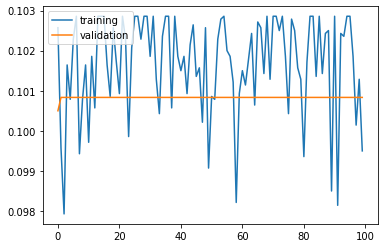

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3028 - accuracy: 0.1000


In [ ]:
print('Test Accuracy', results[1])

Test Accuracy 0.10000000149011612


# 3. Optimizers

  *   Many variants of SGD are proposed and employed nowadays
  *   One of the most popular ones are Adam (Adaptive Moment Estimation)
  *   Doc: https://keras.io/optimizers/





In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(50, input_shape = (3072, )))
model.add(Activation('elu'))    
model.add(Dense(50))
model.add(Activation('elu'))  
model.add(Dense(50))
model.add(Activation('elu'))    
model.add(Dense(50))
model.add(Activation('elu'))    
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
438/438 [==============================] - 3s 5ms/step - loss: 17.3251 - accuracy: 0.1550 - val_loss: 2.6257 - val_accuracy: 0.1937
Epoch 2/100
438/438 [==============================] - 2s 4ms/step - loss: 2.3605 - accuracy: 0.1961 - val_loss: 2.0501 - val_accuracy: 0.2338
Epoch 3/100
438/438 [==============================] - 2s 4ms/step - loss: 2.2298 - accuracy: 0.2398 - val_loss: 2.2124 - val_accuracy: 0.1760
Epoch 4/100
438/438 [==============================] - 2s 4ms/step - loss: 2.2136 - accuracy: 0.2115 - val_loss: 2.0500 - val_accuracy: 0.2315
Epoch 5/100
438/438 [==============================] - 2s 4ms/step - loss: 2.1171 - accuracy: 0.2310 - val_loss: 2.1013 - val_accuracy: 0.2522
Epoch 6/100
438/438 [==============================] - 2s 4ms/step - loss: 2.1303 - accuracy: 0.2263 - val_loss: 2.2368 - val_accuracy: 0.1588
Epoch 7/100
438/438 [==============================] - 2s 4ms/step - loss: 2.1671 - accuracy: 0.1787 - val_loss: 2.1122 - val_accuracy: 0.183

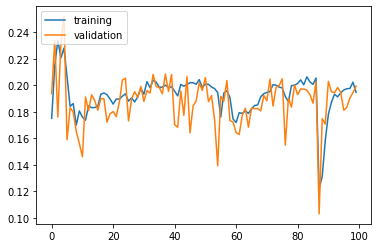

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.0398 - accuracy: 0.2000


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.20000000298023224


# 4. Batch Normalization

In [ ]:
from keras.layers import BatchNormalization

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(50, input_shape = (3072, )))
model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
model.add(Activation('selu'))    
model.add(Dense(50))
model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
model.add(Activation('selu'))    
model.add(Dense(50))
model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
model.add(Activation('selu'))    
model.add(Dense(50))
model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
model.add(Activation('selu'))    
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
adam = optimizers.Adam(lr = 0.001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
438/438 [==============================] - 4s 6ms/step - loss: 2.0131 - accuracy: 0.2885 - val_loss: 1.8566 - val_accuracy: 0.3410
Epoch 2/100
438/438 [==============================] - 2s 5ms/step - loss: 1.7252 - accuracy: 0.3879 - val_loss: 1.9868 - val_accuracy: 0.3328
Epoch 3/100
438/438 [==============================] - 2s 5ms/step - loss: 1.6458 - accuracy: 0.4184 - val_loss: 1.9070 - val_accuracy: 0.3348
Epoch 4/100
438/438 [==============================] - 2s 5ms/step - loss: 1.5798 - accuracy: 0.4462 - val_loss: 1.7658 - val_accuracy: 0.3708
Epoch 5/100
438/438 [==============================] - 2s 5ms/step - loss: 1.5159 - accuracy: 0.4636 - val_loss: 1.7778 - val_accuracy: 0.3798
Epoch 6/100
438/438 [==============================] - 2s 5ms/step - loss: 1.4836 - accuracy: 0.4808 - val_loss: 1.9090 - val_accuracy: 0.3418
Epoch 7/100
438/438 [==============================] - 2s 5ms/step - loss: 1.4383 - accuracy: 0.5025 - val_loss: 1.7584 - val_accuracy: 0.4123

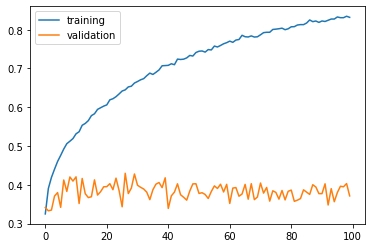

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.1263 - accuracy: 0.3785


In [ ]:
print('Accuracy', results[1])

Accuracy 0.3785000145435333


# 5. Dropout (Regularization)

In [ ]:
from keras.layers import Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(50, input_shape = (3072, )))
model.add(Activation('selu'))    
model.add(Dropout(0.2))                        # Dropout layer after Activation
model.add(Dense(50))
model.add(Activation('selu'))
model.add(Dropout(0.2))                        # Dropout layer after Activation
model.add(Dense(50))
model.add(Activation('selu'))    
model.add(Dropout(0.2))                        # Dropout layer after Activation
model.add(Dense(50))
model.add(Activation('selu'))    
model.add(Dropout(0.2))                         # Dropout layer after Activation
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
adam = optimizers.Adam(lr = 0.001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
438/438 [==============================] - 3s 6ms/step - loss: 2.4114 - accuracy: 0.0955 - val_loss: 2.3073 - val_accuracy: 0.0988
Epoch 2/100
438/438 [==============================] - 2s 5ms/step - loss: 2.3221 - accuracy: 0.0975 - val_loss: 2.3049 - val_accuracy: 0.1017
Epoch 3/100
438/438 [==============================] - 2s 5ms/step - loss: 2.3103 - accuracy: 0.1009 - val_loss: 2.3046 - val_accuracy: 0.1008
Epoch 4/100
438/438 [==============================] - 2s 5ms/step - loss: 2.3076 - accuracy: 0.0975 - val_loss: 2.3036 - val_accuracy: 0.1017
Epoch 5/100
438/438 [==============================] - 2s 5ms/step - loss: 2.3059 - accuracy: 0.0959 - val_loss: 2.3032 - val_accuracy: 0.1008
Epoch 6/100
438/438 [==============================] - 2s 5ms/step - loss: 2.3051 - accuracy: 0.0997 - val_loss: 2.3025 - val_accuracy: 0.1027
Epoch 7/100
438/438 [==============================] - 2s 5ms/step - loss: 2.3045 - accuracy: 0.1018 - val_loss: 2.3032 - val_accuracy: 0.1005

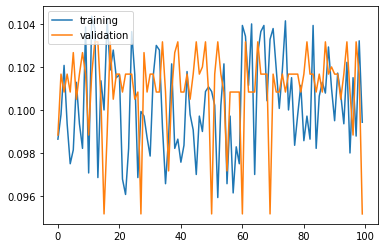

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3028 - accuracy: 0.1000


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.10000000149011612


# 6. Model Ensemble

In [ ]:
import numpy as np

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [ ]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (3072, )))
    model.add(Activation('selu'))    
    model.add(Dense(50))
    model.add(Activation('selu'))    
    model.add(Dense(50))
    model.add(Activation('selu'))    
    model.add(Dense(50))
    model.add(Activation('selu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 30, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 10, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 20, verbose = 0)

In [ ]:
model1._estimator_type = "classifier"
model2._estimator_type = "classifier"
model3._estimator_type = "classifier"

In [ ]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [ ]:
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('model1',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc3466d16d0>),
                             ('model2',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc3466d1810>),
                             ('model3',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc3466d1f10>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [ ]:
y_pred = ensemble_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.1916


# Converting Train Image to GreyScale i.e Black and White Image

In [2]:
from tqdm import tqdm

In [12]:
x_train.shape[0]

50000

In [13]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
x_train[0].astype('str')

array([[['59', '62', '63'],
        ['43', '46', '45'],
        ['50', '48', '43'],
        ...,
        ['158', '132', '108'],
        ['152', '125', '102'],
        ['148', '124', '103']],

       [['16', '20', '20'],
        ['0', '0', '0'],
        ['18', '8', '0'],
        ...,
        ['123', '88', '55'],
        ['119', '83', '50'],
        ['122', '87', '57']],

       [['25', '24', '21'],
        ['16', '7', '0'],
        ['49', '27', '8'],
        ...,
        ['118', '84', '50'],
        ['120', '84', '50'],
        ['109', '73', '42']],

       ...,

       [['208', '170', '96'],
        ['201', '153', '34'],
        ['198', '161', '26'],
        ...,
        ['160', '133', '70'],
        ['56', '31', '7'],
        ['53', '34', '20']],

       [['180', '139', '96'],
        ['173', '123', '42'],
        ['186', '144', '30'],
        ...,
        ['184', '148', '94'],
        ['97', '62', '34'],
        ['83', '53', '34']],

       [['177', '144', '116'],
        ['168', '12

In [20]:
x_train.shape

(50000, 32, 32, 3)

In [24]:
x_train.shape[1],x_train.shape[2],x_train.shape[3]

(32, 32, 3)

In [26]:
tqdm(range(x_train.shape[0]))

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

In [27]:
x_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [16]:
path = 'cifar-10-batches-py'
train_image=[]
train_file=[]
for i in tqdm(range(x_train.shape[0])): 
    img = image.load_img('CIFAR-10 Dataset'+ x_train[i].astype('str')+'.png', target_size=(32,32,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X1=np.array(train_image)

  0%|          | 0/50000 [00:00<?, ?it/s]


UFuncTypeError: ignored

In [34]:
train_image=[]
for i in tqdm(range(x_train.shape[0])):
  img = tf.image.rgb_to_grayscale(x_train[i])
  img = image.img_to_array(img)
  img = img/255
  train_image.append(img)
X_train_image = np.array(train_image)

100%|██████████| 50000/50000 [00:58<00:00, 847.98it/s]


In [23]:
np.array(train_image).shape

(50000, 32, 32, 1)

In [61]:
X_train_image.shape

(50000, 32, 32, 1)

In [41]:
X_train.shape

(40000, 32, 32, 3)

In [47]:
len(X_train[30].shape)

3

In [50]:
X_train[30].shape[2]

3

In [59]:
a = X_train_image[30].resize(X_train_image[30].shape[0],X_train_image[30].shape[1])

In [60]:
print(a)

None


TypeError: ignored

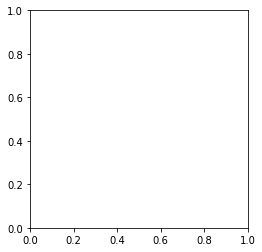

In [54]:
#a = np.array(X_train_image[30])
a = np.expand_dims(a,axis = 0)
plt.imshow(a)

In [62]:
y_train.shape

(50000, 1)

In [64]:
to_categorical(y_train).shape

(50000, 10)

In [65]:
y_train_gs = to_categorical(y_train)

In [66]:
y_train_gs.shape

(50000, 10)

In [42]:
X_train_gs = x_train_gs.reshape((x_train_gs.shape[0],-1))
X_test_gs = x_test_gs.reshape((x_test_gs.shape[0],-1))

In [43]:
X_train_gs.shape

(40000, 1024)

In [45]:
X_test_gs.shape

(10000, 1024)

# Basic MLP model For Greyscale Image

In [57]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [58]:
model = Sequential()

In [59]:
model.add(Dense(50,input_shape = (1024, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [60]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [61]:
history = model.fit(X_train_gs, y_train_gs, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
875/875 [==============================] - 2s 2ms/step - loss: 2.4627 - accuracy: 0.0995 - val_loss: 2.3229 - val_accuracy: 0.1023
Epoch 2/100
875/875 [==============================] - 2s 2ms/step - loss: 2.3163 - accuracy: 0.0972 - val_loss: 2.3036 - val_accuracy: 0.1020
Epoch 3/100
875/875 [==============================] - 2s 2ms/step - loss: 2.3036 - accuracy: 0.1040 - val_loss: 2.3027 - val_accuracy: 0.0975
Epoch 4/100
875/875 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1051
Epoch 5/100
875/875 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.0995 - val_loss: 2.3030 - val_accuracy: 0.0962
Epoch 6/100
875/875 [==============================] - 2s 2ms/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3028 - val_accuracy: 0.1059
Epoch 7/100
875/875 [==============================] - 2s 2ms/step - loss: 2.3024 - accuracy: 0.1027 - val_loss: 2.3028 - val_accuracy: 0.0962

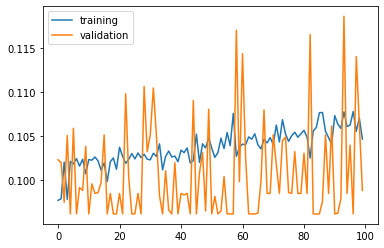

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [63]:
results = model.evaluate(X_test_gs, y_test_gs)

313/313 [==============================] - 1s 2ms/step - loss: 2.3022 - accuracy: 0.0972


In [64]:
print('Test Accuracy',results[1])

Test Accuracy 0.09719999879598618


# 1. Weight Initialization for Greyscale Image

In [65]:
model = Sequential()

In [66]:
model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
model.add(Activation('sigmoid'))    
model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
model.add(Activation('sigmoid'))    
model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
model.add(Activation('sigmoid'))    
model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
model.add(Activation('sigmoid'))    
model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
model.add(Activation('softmax'))

In [67]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [68]:
history = model.fit(X_train_gs, y_train_gs, batch_size = 400,validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
70/70 [==============================] - 1s 10ms/step - loss: 2.5499 - accuracy: 0.1014 - val_loss: 2.5112 - val_accuracy: 0.1021
Epoch 2/100
70/70 [==============================] - 0s 7ms/step - loss: 2.4999 - accuracy: 0.1020 - val_loss: 2.4704 - val_accuracy: 0.1021
Epoch 3/100
70/70 [==============================] - 0s 7ms/step - loss: 2.4586 - accuracy: 0.1010 - val_loss: 2.4390 - val_accuracy: 0.1021
Epoch 4/100
70/70 [==============================] - 0s 7ms/step - loss: 2.4364 - accuracy: 0.0970 - val_loss: 2.4144 - val_accuracy: 0.1021
Epoch 5/100
70/70 [==============================] - 0s 7ms/step - loss: 2.4098 - accuracy: 0.1002 - val_loss: 2.3948 - val_accuracy: 0.1021
Epoch 6/100
70/70 [==============================] - 0s 6ms/step - loss: 2.3896 - accuracy: 0.1010 - val_loss: 2.3791 - val_accuracy: 0.1021
Epoch 7/100
70/70 [==============================] - 0s 7ms/step - loss: 2.3788 - accuracy: 0.0992 - val_loss: 2.3663 - val_accuracy: 0.1021
Epoch 8/100


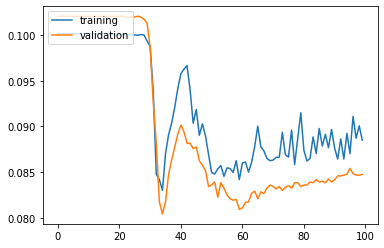

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [70]:
results = model.evaluate(X_test_gs, y_test_gs)

313/313 [==============================] - 1s 2ms/step - loss: 2.3031 - accuracy: 0.0870


In [71]:
print('Test Accuracy',results[1])

Test Accuracy 0.08699999749660492


## 2. Nonlinearity (Activation function) For GreyScale Image

In [72]:
model = Sequential()

In [73]:
model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
model.add(Activation('relu'))    # use relu
model.add(Dense(50, kernel_initializer='he_normal'))
model.add(Activation('relu'))    # use relu
model.add(Dense(50, kernel_initializer='he_normal'))
model.add(Activation('relu'))    # use relu
model.add(Dense(50, kernel_initializer='he_normal'))
model.add(Activation('relu'))    # use relu
model.add(Dense(10, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [74]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [76]:
history = model.fit(X_train_gs, y_train_gs, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
875/875 [==============================] - 2s 2ms/step - loss: 2.3111 - accuracy: 0.1078 - val_loss: 2.2635 - val_accuracy: 0.1380
Epoch 2/100
875/875 [==============================] - 2s 2ms/step - loss: 2.2469 - accuracy: 0.1669 - val_loss: 2.2171 - val_accuracy: 0.1889
Epoch 3/100
875/875 [==============================] - 2s 2ms/step - loss: 2.2032 - accuracy: 0.1982 - val_loss: 2.1821 - val_accuracy: 0.2028
Epoch 4/100
875/875 [==============================] - 2s 2ms/step - loss: 2.1700 - accuracy: 0.2115 - val_loss: 2.1534 - val_accuracy: 0.2163
Epoch 5/100
875/875 [==============================] - 2s 2ms/step - loss: 2.1459 - accuracy: 0.2151 - val_loss: 2.1269 - val_accuracy: 0.2223
Epoch 6/100
875/875 [==============================] - 2s 2ms/step - loss: 2.1181 - accuracy: 0.2226 - val_loss: 2.1044 - val_accuracy: 0.2338
Epoch 7/100
875/875 [==============================] - 2s 2ms/step - loss: 2.0971 - accuracy: 0.2356 - val_loss: 2.0843 - val_accuracy: 0.2414

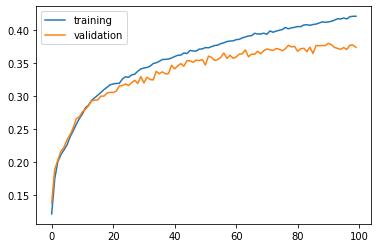

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [78]:
results = model.evaluate(X_test_gs, y_test_gs)

313/313 [==============================] - 1s 1ms/step - loss: 1.7581 - accuracy: 0.3777


In [79]:
print('Test Accuracy', results[1])

Test Accuracy 0.37770000100135803


# 3. Optimizers For GreyScale Image

In [80]:
model = Sequential()

In [81]:
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('elu'))    
model.add(Dense(50))
model.add(Activation('elu'))  
model.add(Dense(50))
model.add(Activation('elu'))    
model.add(Dense(50))
model.add(Activation('elu'))    
model.add(Dense(10))
model.add(Activation('softmax'))

In [82]:
adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [83]:
history = model.fit(X_train_gs, y_train_gs, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
875/875 [==============================] - 3s 3ms/step - loss: 2.1350 - accuracy: 0.2146 - val_loss: 1.9270 - val_accuracy: 0.3048
Epoch 2/100
875/875 [==============================] - 2s 2ms/step - loss: 1.9226 - accuracy: 0.3065 - val_loss: 1.9427 - val_accuracy: 0.2996
Epoch 3/100
875/875 [==============================] - 2s 2ms/step - loss: 1.8702 - accuracy: 0.3282 - val_loss: 1.8548 - val_accuracy: 0.3327
Epoch 4/100
875/875 [==============================] - 2s 2ms/step - loss: 1.8150 - accuracy: 0.3510 - val_loss: 1.8420 - val_accuracy: 0.3362
Epoch 5/100
875/875 [==============================] - 2s 2ms/step - loss: 1.7785 - accuracy: 0.3636 - val_loss: 1.8218 - val_accuracy: 0.3523
Epoch 6/100
875/875 [==============================] - 2s 2ms/step - loss: 1.7534 - accuracy: 0.3674 - val_loss: 1.7784 - val_accuracy: 0.3635
Epoch 7/100
875/875 [==============================] - 2s 2ms/step - loss: 1.7375 - accuracy: 0.3773 - val_loss: 1.7589 - val_accuracy: 0.3723

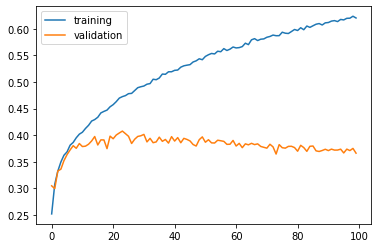

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [85]:
results = model.evaluate(X_test_gs, y_test_gs)

313/313 [==============================] - 1s 2ms/step - loss: 2.2645 - accuracy: 0.3742


In [86]:
print('Test Accuracy', results[1])

Test Accuracy 0.3741999864578247


# 4. Batch Normalization For GreyScale Image

In [87]:
from keras.layers import BatchNormalization

In [88]:
model = Sequential()

In [91]:
model.add(Dense(50, input_shape = (1024, )))
model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
model.add(Activation('selu'))    
model.add(Dense(50))
model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
model.add(Activation('selu'))    
model.add(Dense(50))
model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
model.add(Activation('selu'))    
model.add(Dense(50))
model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
model.add(Activation('selu'))    
model.add(Dense(10))
model.add(Activation('softmax'))

In [93]:
adam = optimizers.Adam(lr = 0.001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [94]:
history = model.fit(X_train_gs, y_train_gs, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
875/875 [==============================] - 7s 5ms/step - loss: 2.2106 - accuracy: 0.2009 - val_loss: 2.0526 - val_accuracy: 0.2457
Epoch 2/100
875/875 [==============================] - 4s 5ms/step - loss: 2.0411 - accuracy: 0.2578 - val_loss: 2.1726 - val_accuracy: 0.2393
Epoch 3/100
875/875 [==============================] - 4s 5ms/step - loss: 2.0057 - accuracy: 0.2812 - val_loss: 2.0289 - val_accuracy: 0.2791
Epoch 4/100
875/875 [==============================] - 4s 5ms/step - loss: 1.9651 - accuracy: 0.2972 - val_loss: 2.0508 - val_accuracy: 0.2900
Epoch 5/100
875/875 [==============================] - 4s 5ms/step - loss: 1.9368 - accuracy: 0.3071 - val_loss: 1.9973 - val_accuracy: 0.2857
Epoch 6/100
875/875 [==============================] - 4s 5ms/step - loss: 1.9293 - accuracy: 0.3053 - val_loss: 1.9651 - val_accuracy: 0.2958
Epoch 7/100
875/875 [==============================] - 4s 5ms/step - loss: 1.9096 - accuracy: 0.3174 - val_loss: 1.9779 - val_accuracy: 0.2872

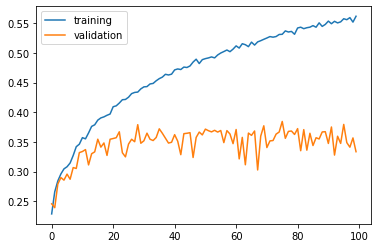

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [96]:
results = model.evaluate(X_test_gs, y_test_gs)

313/313 [==============================] - 1s 2ms/step - loss: 2.1235 - accuracy: 0.3343


In [97]:
print('Test Accuracy', results[1])

Test Accuracy 0.3343000113964081


# 5. Dropout (Regularization) for Greyscale Image

In [98]:
from keras.layers import Dropout

In [99]:
model = Sequential()

In [102]:
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('selu'))    
model.add(Dropout(0.2))                        # Dropout layer after Activation
model.add(Dense(50))
model.add(Activation('selu'))
model.add(Dropout(0.2))                        # Dropout layer after Activation
model.add(Dense(50))
model.add(Activation('selu'))    
model.add(Dropout(0.2))                        # Dropout layer after Activation
model.add(Dense(50))
model.add(Activation('selu'))    
model.add(Dropout(0.2))                         # Dropout layer after Activation
model.add(Dense(10))
model.add(Activation('softmax'))

In [104]:
adam = optimizers.Adam(lr = 0.001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [105]:
history = model.fit(X_train_gs, y_train_gs, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
875/875 [==============================] - 4s 4ms/step - loss: 2.3253 - accuracy: 0.0974 - val_loss: 2.3059 - val_accuracy: 0.0996
Epoch 2/100
875/875 [==============================] - 3s 4ms/step - loss: 2.3080 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.1013
Epoch 3/100
875/875 [==============================] - 3s 4ms/step - loss: 2.3057 - accuracy: 0.0963 - val_loss: 2.3060 - val_accuracy: 0.0962
Epoch 4/100
875/875 [==============================] - 3s 4ms/step - loss: 2.3045 - accuracy: 0.1076 - val_loss: 2.3031 - val_accuracy: 0.0985
Epoch 5/100
875/875 [==============================] - 3s 4ms/step - loss: 2.3047 - accuracy: 0.0973 - val_loss: 2.3033 - val_accuracy: 0.1037
Epoch 6/100
875/875 [==============================] - 3s 4ms/step - loss: 2.3050 - accuracy: 0.0973 - val_loss: 2.3038 - val_accuracy: 0.0985
Epoch 7/100
875/875 [==============================] - 3s 4ms/step - loss: 2.3044 - accuracy: 0.0988 - val_loss: 2.3042 - val_accuracy: 0.0962

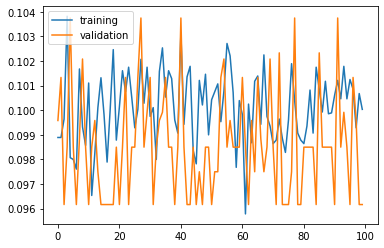

In [106]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [107]:
results = model.evaluate(X_test_gs, y_test_gs)

313/313 [==============================] - 1s 2ms/step - loss: 2.3032 - accuracy: 0.0982


In [108]:
print('Test Accuracy', results[1])

Test Accuracy 0.0982000008225441


# 6. Model Ensemble for GreyScale Image

In [110]:
import numpy as np

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [113]:
y_train_gs

array([5, 8, 1, ..., 3, 2, 0])

In [114]:
y_test_gs

array([9, 3, 0, ..., 4, 6, 1])

In [116]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, )))
    model.add(Activation('selu'))    
    model.add(Dense(50))
    model.add(Activation('selu'))    
    model.add(Dense(50))
    model.add(Activation('selu'))    
    model.add(Dense(50))
    model.add(Activation('selu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [117]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 30, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 10, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 20, verbose = 0)

In [119]:
model1._estimator_type = "classifier"
model2._estimator_type = "classifier"
model3._estimator_type = "classifier"

In [120]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [121]:
ensemble_clf.fit(X_train_gs, y_train_gs)

VotingClassifier(estimators=[('model1',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f4e45bb3e50>),
                             ('model2',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f4e45bb3a50>),
                             ('model3',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f4e45bb3910>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [122]:
y_pred_gs = ensemble_clf.predict(X_test_gs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [123]:
print('Test accuracy:', accuracy_score(y_pred_gs, y_test_gs))

Test accuracy: 0.4326


# CNN model for color and greyscale Images

## Color Model CNN

In [4]:
model = Sequential()

In [5]:
model.add(Conv2D(32,kernel_size =(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer = 'Adam',metrics=['accuracy'])

In [14]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
y_train.shape

(50000, 10)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(x_train,y_train,random_state = 42,test_size = 0.2)

In [17]:
X_train.shape

(40000, 32, 32, 3)

In [18]:
X_test.shape

(10000, 32, 32, 3)

In [19]:
y_train.shape

(40000, 10)

In [20]:
y_test.shape

(10000, 10)

In [21]:
model.fit(X_train,y_train,epochs = 20,validation_data =(X_test, y_test))

Epoch 1/20
1250/1250 [==============================] - 143s 114ms/step - loss: 7.0331 - accuracy: 0.1000 - val_loss: 2.3031 - val_accuracy: 0.0973
Epoch 2/20
1250/1250 [==============================] - 142s 114ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3031 - val_accuracy: 0.0973
Epoch 3/20
1250/1250 [==============================] - 142s 114ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.0933
Epoch 4/20
1250/1250 [==============================] - 142s 114ms/step - loss: 2.3027 - accuracy: 0.0967 - val_loss: 2.3031 - val_accuracy: 0.0933
Epoch 5/20
1250/1250 [==============================] - 143s 114ms/step - loss: 2.3037 - accuracy: 0.1010 - val_loss: 2.3029 - val_accuracy: 0.0979
Epoch 6/20
1250/1250 [==============================] - 142s 114ms/step - loss: 2.3027 - accuracy: 0.1015 - val_loss: 2.3028 - val_accuracy: 0.0979
Epoch 7/20
1250/1250 [==============================] - 143s 114ms/step - loss: 2.3051 - accuracy: 0.0998 - val_

# GrayScale Model CNN with name model_1

In [ ]:
x_train_gs,x_test_gs,y_train_gs,y_test_gs = train_test_split(X_train_image,y_train_gs,random_state = 14,test_size = 0.2)

In [ ]:
x_train_gs.shape

(40000, 32, 32, 1)

In [ ]:
x_test_gs.shape

(10000, 32, 32, 1)

In [ ]:
y_train_gs.shape

(40000, 10)

In [ ]:
y_test_gs.shape

(10000, 10)

In [73]:
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,1)))
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))

In [74]:
model_1.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [75]:
model_1.fit(x_train_gs, y_train_gs, epochs=10, validation_data=(x_test_gs, y_test_gs))

Epoch 1/10
1250/1250 [==============================] - 139s 111ms/step - loss: 1.8997 - accuracy: 0.3056 - val_loss: 1.3253 - val_accuracy: 0.5447
Epoch 2/10
1250/1250 [==============================] - 138s 110ms/step - loss: 1.3653 - accuracy: 0.5194 - val_loss: 1.1770 - val_accuracy: 0.5968
Epoch 3/10
1250/1250 [==============================] - 138s 110ms/step - loss: 1.2126 - accuracy: 0.5746 - val_loss: 1.0944 - val_accuracy: 0.6213
Epoch 4/10
1250/1250 [==============================] - 138s 110ms/step - loss: 1.1340 - accuracy: 0.6058 - val_loss: 1.0719 - val_accuracy: 0.6286
Epoch 5/10
1250/1250 [==============================] - 138s 111ms/step - loss: 1.0668 - accuracy: 0.6239 - val_loss: 1.0333 - val_accuracy: 0.6389
Epoch 6/10
1250/1250 [==============================] - 138s 111ms/step - loss: 1.0122 - accuracy: 0.6453 - val_loss: 1.0711 - val_accuracy: 0.6336
Epoch 7/10
1250/1250 [==============================] - 138s 110ms/step - loss: 0.9554 - accuracy: 0.6650 - val_